In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import librosa 
import librosa.display

/tmp/ipykernel_16408/1607787914.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  murmur_present["TypeOfMurmurs"] = ""


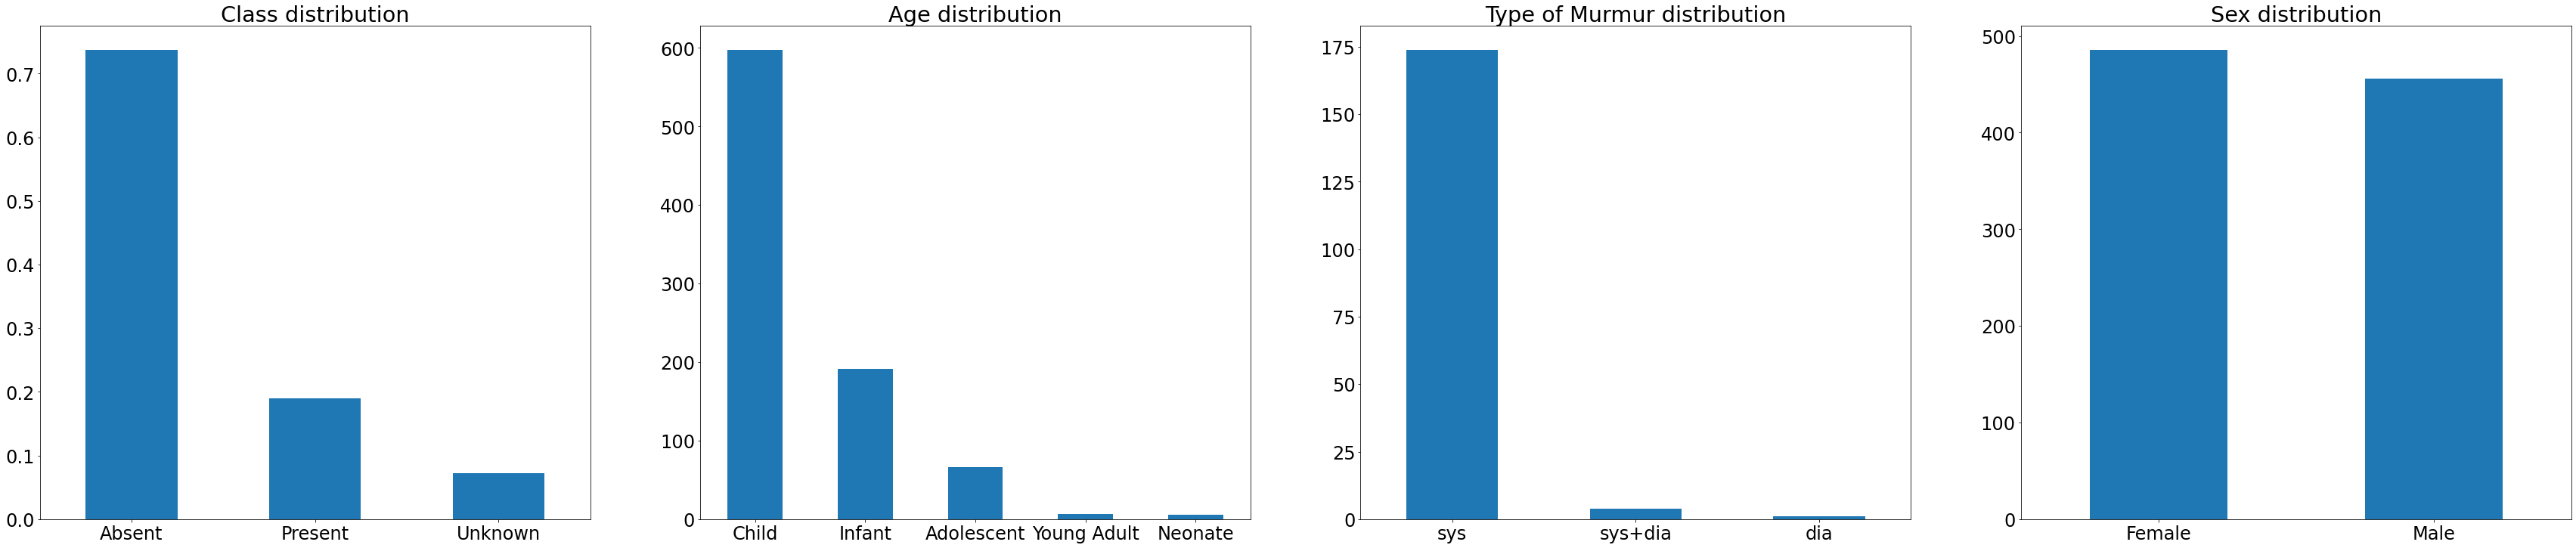

In [31]:
DATADIR = "./1.0.1/"
# print(demographics)
# config
plt.rcParams.update({'font.size': 24})
demographics = pd.read_csv(DATADIR+"training_data.csv") 
fig,ax = plt.subplots(ncols=4,figsize=(60,12))


# distribution of the classes
class_dist = demographics["Murmur"].value_counts(normalize=True).plot.bar(x="Murmur",y="val",rot=0,title="Class distribution",ax=ax[0])
# distribution of the age
age_dist = demographics["Age"].value_counts().plot.bar(x="Age group",y="val",rot=0,title="Age distribution",ax=ax[1])
# distribution of systolic/diastolic murmurs
murmur_present = demographics.loc[demographics["Murmur"]=="Present"]
murmur_present["TypeOfMurmurs"] = ""
murmur_present.loc[(~murmur_present["Systolic murmur timing"].isnull() & ~murmur_present["Diastolic murmur timing"].isnull()),"TypeOfMurmurs"] = "sys+dia"
murmur_present.loc[(murmur_present["Systolic murmur timing"].isnull() & ~murmur_present["Diastolic murmur timing"].isnull()),"TypeOfMurmurs"] = "dia"
murmur_present.loc[(~murmur_present["Systolic murmur timing"].isnull() & murmur_present["Diastolic murmur timing"].isnull()),"TypeOfMurmurs"] = "sys"
murmur_distribution = murmur_present["TypeOfMurmurs"].value_counts().plot.bar(x="Type of Murmurs Present",y="val",rot=0,title="Type of Murmur distribution",ax=ax[2])
# distribution of sex
sex_dist = demographics["Sex"].value_counts().plot.bar(x="Sex",y="val",rot=0,title="Sex distribution",ax=ax[3])


    n_mfcc  accuracy
0       10  0.592715
1       20  0.624172
2       30  0.639073
3       40  0.647351
4       50  0.566225
5       60  0.556291
6       70  0.557947
7       80  0.624172
8       90  0.634106
9      100  0.619205
10     110  0.564570
11     120  0.551325
12     130  0.556291
13     140  0.561258
14     150  0.559603
15     160  0.557947
16     170  0.562914
17     180  0.556291
18     190  0.556291
19     200  0.556291
20     210  0.554636
21     220  0.556291
22     230  0.557947
23     240  0.559603
24     250  0.559603
25     260  0.564570


<AxesSubplot:title={'center':'accuracy against n_mfcc'}, xlabel='n_mfcc'>

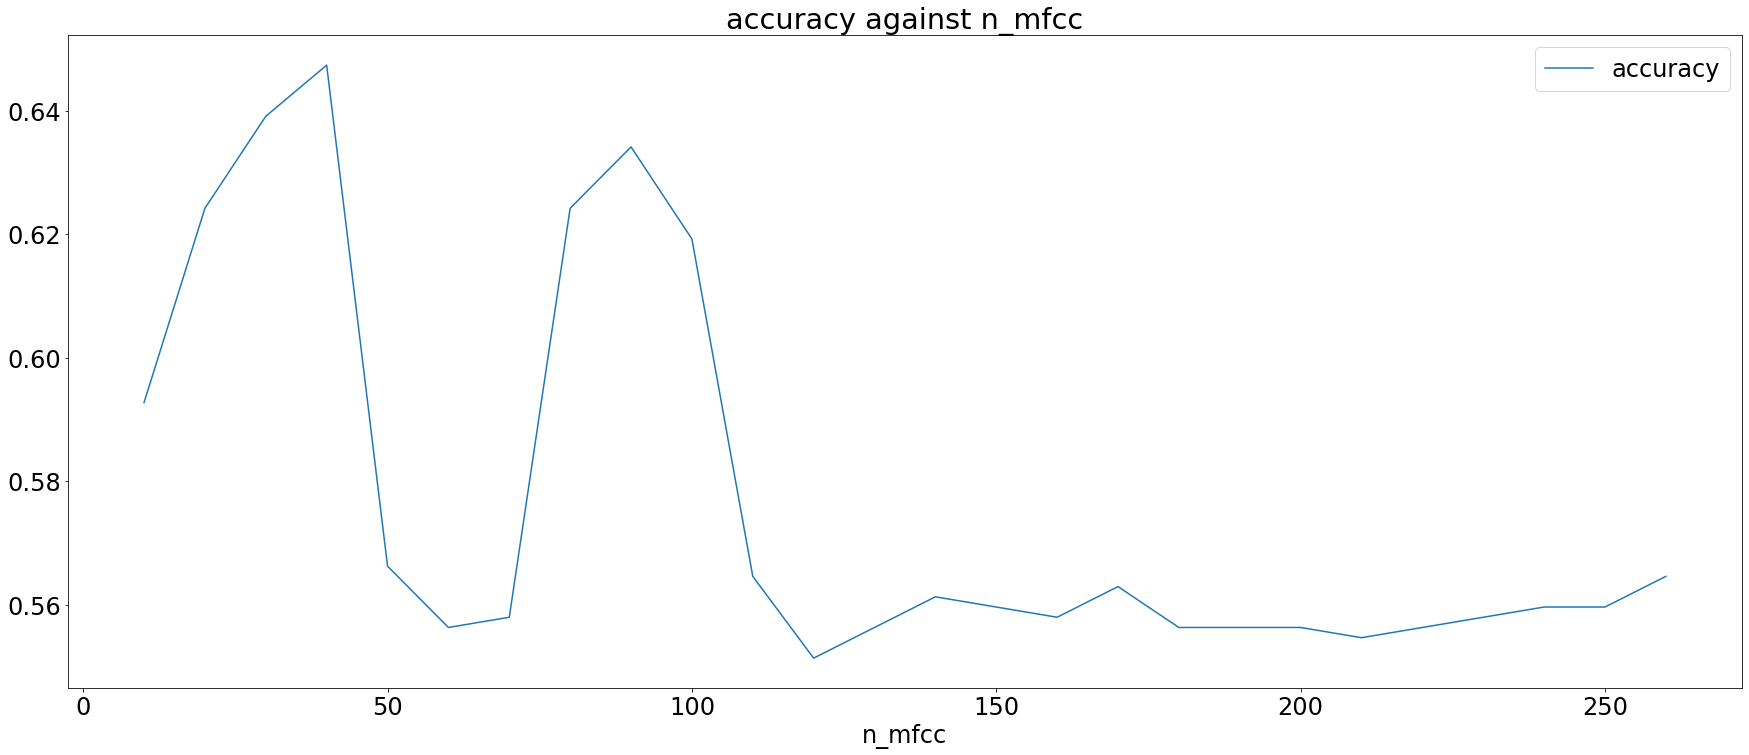

In [31]:
plt.rcParams.update({'font.size': 24})
mfcc_opts = pd.read_excel("./opt_run_sheets/mfcc_opts.xlsx")
print(mfcc_opts)
mfcc_opts.plot.line(x="n_mfcc",y="accuracy",figsize=(30,12),title="accuracy against n_mfcc")

/tmp/ipykernel_28659/3444059432.py:6: FutureWarning: Pass y=[0.05044556 0.11642456 0.09463501 ... 0.00570679 0.01062012 0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S_mfcc = librosa.amplitude_to_db(librosa.feature.melspectrogram(S,sr=4000))


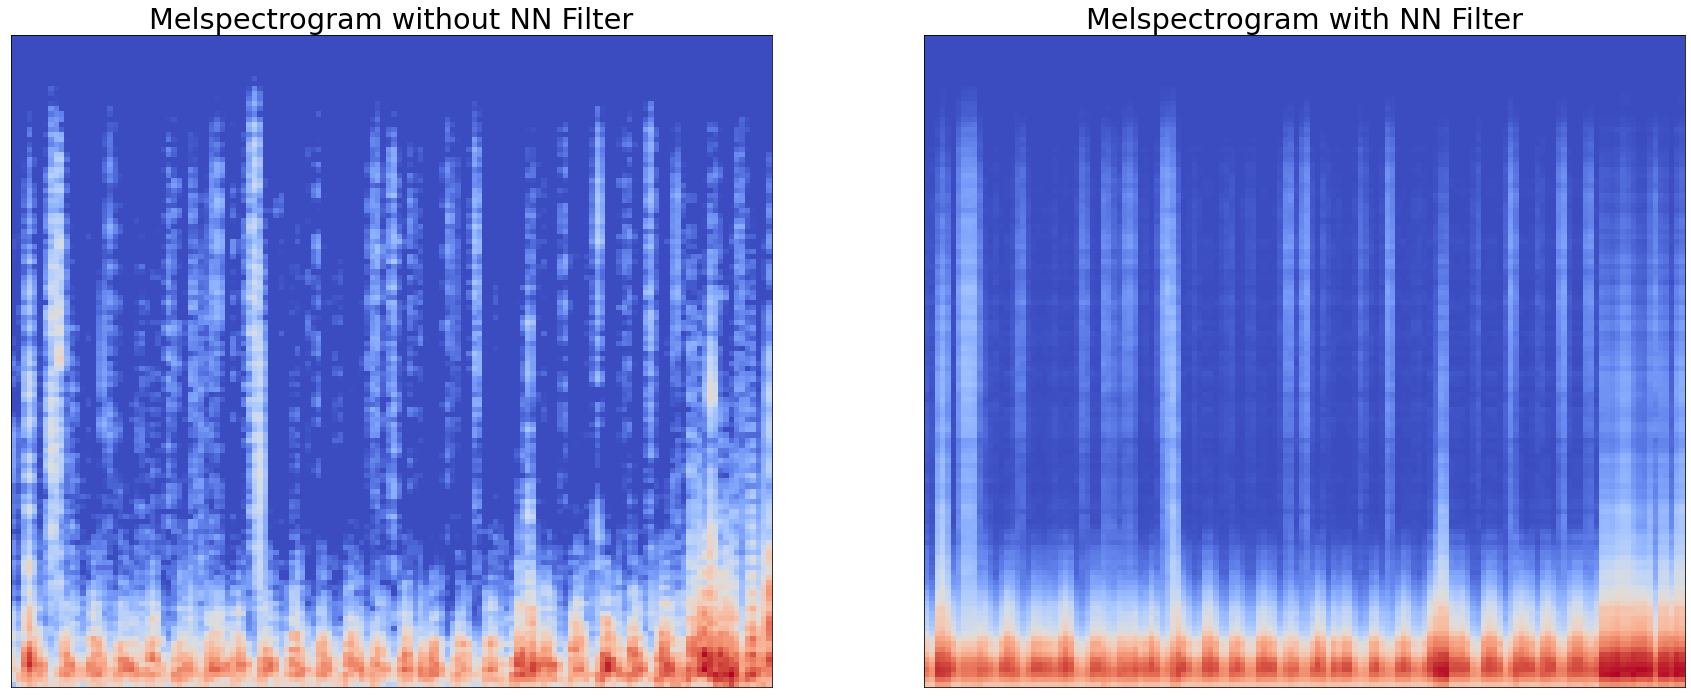

In [19]:
# show the effect of nn filter
plt.rcParams.update({'font.size': 24})

DATADIR = "./1.0.1/training_data/9979_AV.wav"
S,sr = librosa.load(DATADIR,sr=4000)
S_mfcc = librosa.amplitude_to_db(librosa.feature.melspectrogram(S,sr=4000))
S_mfcc_nn = librosa.decompose.nn_filter(S_mfcc)

fig,ax= plt.subplots(ncols=2,figsize=(30,12))
librosa.display.specshow(S_mfcc,ax=ax[0])
ax[0].title.set_text("Melspectrogram without NN Filter")
librosa.display.specshow(S_mfcc_nn,ax=ax[1])
ax[1].title.set_text("Melspectrogram with NN Filter")


   time_allocated  accuracy  f1_score
0              60     0.650  0.612844
1             120     0.650  0.612844
2             240     0.650  0.612844
3             480     0.592  0.380711
4             960     0.599  0.372449
5            1920     0.599  0.382000
6            3840     0.599  0.359000
7            7680     0.599  0.359000
8           15360     0.600  0.379221


<AxesSubplot:title={'center':'f1_score plotted against time allocated'}, xlabel='time_allocated'>

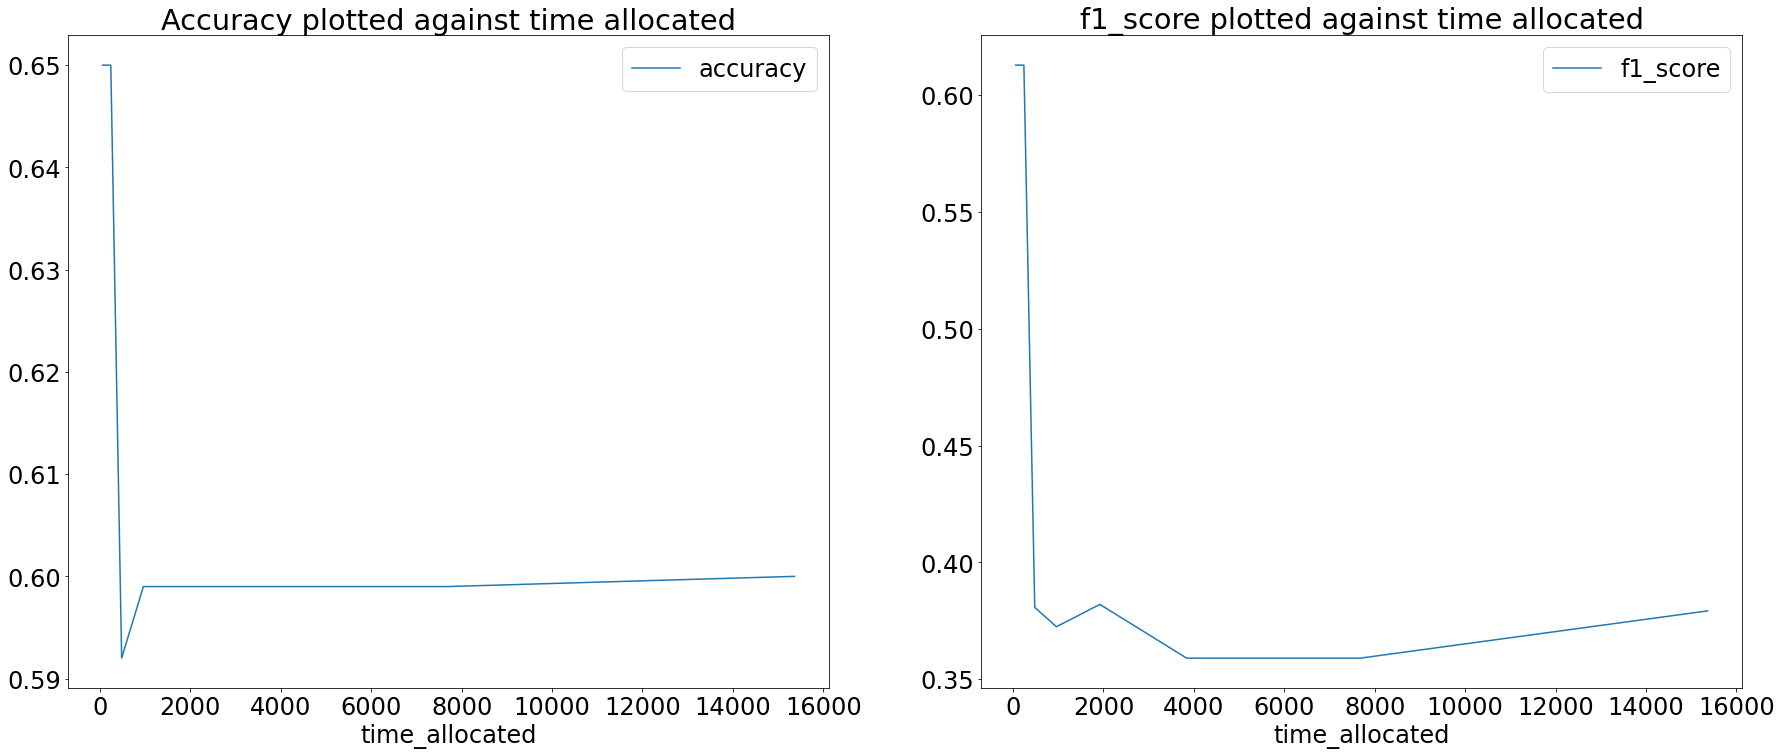

In [32]:
# show the effect of increasing time allocation
plt.rcParams.update({'font.size': 24})
time_allocate_df = pd.read_excel("./opt_run_sheets/time_allocation_opts.xlsx",index_col=False)
print(time_allocate_df)
fig,ax=plt.subplots(ncols=2,figsize=(30,12))
time_allocate_df.plot.line(x="time_allocated",y="accuracy",ax=ax[0],title="Accuracy plotted against time allocated")
time_allocate_df.plot.line(x="time_allocated",y="f1_score",ax=ax[1],title="f1_score plotted against time allocated")
